In [1]:
!python3 -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/f8/7f/5b047effafbdd34e52c9e2d7e44f729a0655efafb22198c45cf692cdc157/pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 7.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 13.4 MB/s eta 0:00:0000:0100:01


In [1]:
import tensorflow as tf
tf.__version__

2023-08-05 04:19:48.287582: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-05 04:19:48.332295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.13.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(units=10, activation="softmax")
])

2023-08-05 04:19:54.953341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-05 04:19:54.972566: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-05 04:19:54.973970: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-05 04:19:54.981479: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-05 04:19:54.982552: I tensorflow/compile

## The fit method

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [5]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
sparse_categorical_crosssentropy_loss = tf.keras.losses.SparseCategoricalCrossentropy()
sparse_categorical_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()
mean_absolute_error_metric = tf.keras.metrics.MeanAbsoluteError()

In [6]:
model.compile(
    optimizer=adam_optimizer,
    loss=sparse_categorical_crosssentropy_loss,
    metrics=[sparse_categorical_accuracy_metric, mean_absolute_error_metric]
)

#### Load the data

In [7]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [8]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [9]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [10]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

In [11]:
train_images.shape

(60000, 28, 28)

label: Ankle boot


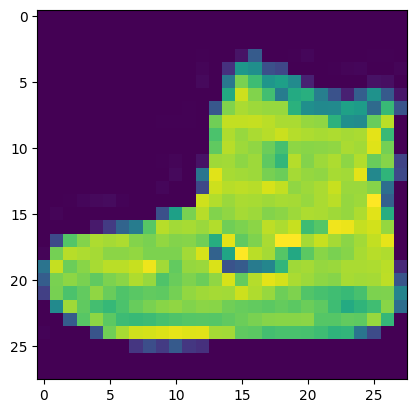

In [12]:
# Display one of the images

index = 0
image = train_images[index, :, :]
plt.imshow(image)
print(f"label: {labels[train_labels[index]]}")

### Fit the model

In [13]:
train_images[..., np.newaxis].shape

(60000, 28, 28, 1)

In [14]:
history = model.fit(train_images[..., np.newaxis], train_labels, batch_size=256, epochs=8, verbose=2)

Epoch 1/8


2023-08-05 04:20:15.550549: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-05 04:20:18.663310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-05 04:20:18.681879: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2684011eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-05 04:20:18.681915: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2023-08-05 04:20:18.688393: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-05 04:20:18.804139: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

235/235 - 7s - loss: 1.0927 - sparse_categorical_accuracy: 0.6733 - mean_absolute_error: 4.4200 - 7s/epoch - 30ms/step
Epoch 2/8
235/235 - 1s - loss: 0.5845 - sparse_categorical_accuracy: 0.7925 - mean_absolute_error: 4.4200 - 706ms/epoch - 3ms/step
Epoch 3/8
235/235 - 1s - loss: 0.5016 - sparse_categorical_accuracy: 0.8238 - mean_absolute_error: 4.4200 - 776ms/epoch - 3ms/step
Epoch 4/8
235/235 - 1s - loss: 0.4586 - sparse_categorical_accuracy: 0.8406 - mean_absolute_error: 4.4200 - 734ms/epoch - 3ms/step
Epoch 5/8
235/235 - 1s - loss: 0.4310 - sparse_categorical_accuracy: 0.8511 - mean_absolute_error: 4.4200 - 706ms/epoch - 3ms/step
Epoch 6/8
235/235 - 1s - loss: 0.4115 - sparse_categorical_accuracy: 0.8573 - mean_absolute_error: 4.4200 - 706ms/epoch - 3ms/step
Epoch 7/8
235/235 - 1s - loss: 0.3979 - sparse_categorical_accuracy: 0.8622 - mean_absolute_error: 4.4200 - 702ms/epoch - 3ms/step
Epoch 8/8
235/235 - 1s - loss: 0.3850 - sparse_categorical_accuracy: 0.8663 - mean_absolute_err

In [15]:
import pandas as pd

#### Plot training history

In [16]:
# Load the history into a pandas Dataframe

history_df = pd.DataFrame(history.history)
history_df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,1.092715,0.673333,4.419999
1,0.584451,0.792467,4.420001
2,0.501551,0.823750,4.419999
3,0.458574,0.840600,4.419999
4,0.430954,0.851133,4.420000


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

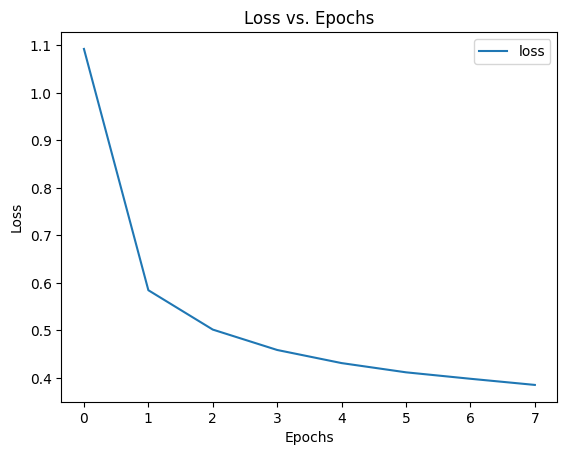

In [17]:
# Make a plot for the loss

loss_plot = history_df.plot(y="loss", title="Loss vs. Epochs")
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Sparse Categorical Accuracy')]

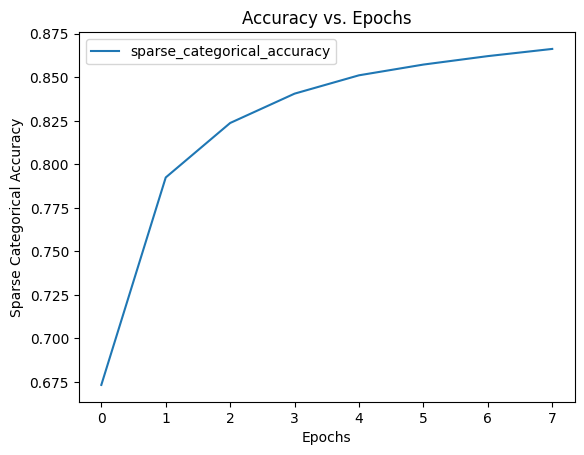

In [18]:
# Make a plot for the accuracy

accuracy_plot = history_df.plot(y="sparse_categorical_accuracy", title="Accuracy vs. Epochs")
accuracy_plot.set(xlabel="Epochs", ylabel="Sparse Categorical Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Mean Absolute Error')]

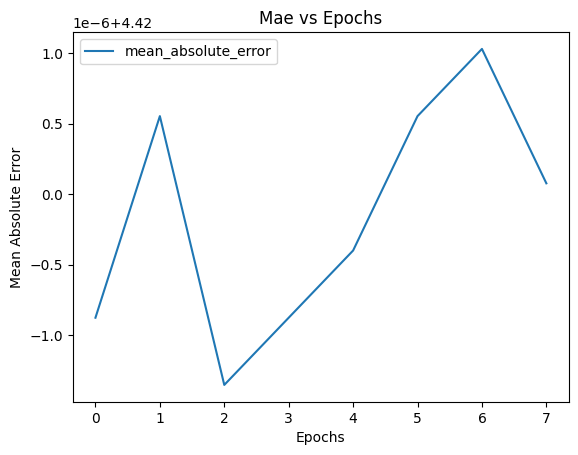

In [19]:
# Make a plot for the additional metric

mae_plot = history_df.plot(y="mean_absolute_error", title= "Mae vs Epochs")
mae_plot.set(xlabel="Epochs", ylabel="Mean Absolute Error", )